## Análise Exploratória: Doenças cardíacas e estilo de vida

Os dados utilizados foram coletados na plataforma kaggle no seguinte endereço: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

São apenas 70mil linhas de registros, porém foi aplicado o spliter de arquivos para simular um arquivo maior e que deveria ser dividido em vários arquivos menores
a fim de aplicar o aggregator que o spark realiza.

Os arquivos divididos encontram-se em: https://github.com/jeanluckei/lcbd/tree/main/files

(Realizei alguns testes de integração com o github, porém funcionou apenas utilizando um curl para copiar os arquivos para o databricks, portanto optei por realizar o upload deles diretamente pela interface do databricks.)

#### Objetivo: Identificar parâmetros que podem estar relacionados a doenças cardíacas

Como os dados foram adquiridos: através de exame médico e informações dos pacientes;

#### Descrição dos dados:

Idade | age | int (dias)

Altura | height | int (cm)

Peso | weight | float (kg) |

Gênero | gender | 1: Feminino, 2: Masculino |

Pressão arterial sistólica | ap_hi | int |

Pressão sanguínea diastólica | ap_lo | int |

Colesterol | cholesterol | 1: normal, 2: acima normal, 3: muito acima normal |

Glicose | gluc | 1: normal, 2: acima normal, 3: muito acima normal |

Fuma? | smoke | binary |

Alcool? | alco | binary |

Atividade Física? | active | binary |

Doença Cardiovascular? | cardio | binary |

In [0]:
#Lista os arquivos que foram carregados à partir do menu de importação de dados do databricks
dbutils.fs.ls("/FileStore/tables/heart")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/heart/heart_disease_0.csv', name='heart_disease_0.csv', size=423630),
 FileInfo(path='dbfs:/FileStore/tables/heart/heart_disease_1.csv', name='heart_disease_1.csv', size=431390),
 FileInfo(path='dbfs:/FileStore/tables/heart/heart_disease_2.csv', name='heart_disease_2.csv', size=431467),
 FileInfo(path='dbfs:/FileStore/tables/heart/heart_disease_3.csv', name='heart_disease_3.csv', size=431443),
 FileInfo(path='dbfs:/FileStore/tables/heart/heart_disease_4.csv', name='heart_disease_4.csv', size=431374),
 FileInfo(path='dbfs:/FileStore/tables/heart/heart_disease_5.csv', name='heart_disease_5.csv', size=431489),
 FileInfo(path='dbfs:/FileStore/tables/heart/heart_disease_6.csv', name='heart_disease_6.csv', size=431490)]

In [0]:
#Aqui podemos listar a quantidade de arquivos e o tamanho total deles.
data_dir = "/FileStore/tables/heart/"
print('Tamanho total dos arquivos (em formato Parquet):', sum([x.size for x in dbutils.fs.ls(data_dir)]) / 1000000000.0, 'GB\n')
print('Quantidade de arquivos:', len(dbutils.fs.ls(data_dir)))

Tamanho total dos arquivos (em formato Parquet): 0.003012283 GB

Quantidade de arquivos: 7

#### Criando um DataFrame a partir dos arquivos em formato Parquet

Como identificado acima, temos vários arquivos splitados e portanto iremos concatená-los em um dataframe utilizando a função `spark.read.csv`.

In [0]:
#Aqui passamos o diretório onde estão os arquivos e um wildcard (*) para buscar todos os CSVs dentro deste diretório.
hearts = spark.read.format("csv").option("header", "true").option("delimiter", ";").load("/FileStore/tables/heart/*.csv")
#E então exibimos os dados
display(hearts)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
85655,22584,2,169,86.0,160,90,1,1,0,0,0,1
85656,19149,1,165,62.0,110,60,1,1,0,0,1,0
85658,14453,1,159,67.0,120,80,1,1,0,0,1,0
85659,15877,1,168,59.0,110,70,1,1,0,0,0,0
85660,21228,2,167,70.0,130,80,2,2,1,0,1,1
85661,19911,2,163,82.0,140,90,1,1,1,1,0,1
85662,15485,1,169,65.0,110,70,1,1,0,0,0,0
85665,17304,1,153,70.0,140,90,3,1,0,0,1,1
85666,20421,1,160,76.0,130,90,1,1,0,0,1,1
85668,15509,2,169,67.8,140,1100,2,1,0,1,1,1


#### Tratamento inicial dos dados (pré processamento)

Como identificado acima, a coluna ID representa o ID do sistema origem, podemos desconsiderá-la aqui neste estudo;

A coluna 'age' está em dias, podemos transformá-la em anos;

A coluna 'gender' não está em binário, podemos alterá-la para X-1, assim 0=Feminino e 1=Masculino;

Além dos dados anteriores, podemos gerar outros dados como o IMC que é dado pela fórmula: weight(Kg)/height(m)^2

In [0]:
#Realizando o tratamento inicial dos dados de ID, age e gender, além de transformar campos numéricos que estavam em string para Integer
import pyspark.sql.functions as F
from pyspark.sql.functions import col
heartsPreProcessed = hearts.drop('id') \
    .withColumn('age',(col('age')/365).cast('Integer')) \
    .withColumn('height',col('height').cast('Integer')) \
    .withColumn('weight',col('weight').cast('Integer')) \
    .withColumn('alco',col('alco').cast('Integer')) \
    .withColumn('smoke',col('smoke').cast('Integer')) \
    .withColumn('active',col('active').cast('Integer')) \
    .withColumn('cardio',col('cardio').cast('Integer')) \
    .withColumn('cholesterol',col('cholesterol').cast('Integer')) \
    .withColumn('gluc',col('gluc').cast('Integer')) \
    .withColumn('ap_hi',col('ap_hi').cast('Integer')) \
    .withColumn('ap_lo',col('ap_lo').cast('Integer')) \
    .withColumn('gender',col('gender').cast('Integer')-1) \
    .withColumn('bmi',F.round((col('weight')/((col('height')*col('height'))/10000)), 1))
display(heartsPreProcessed)

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
61,1,169,86,160,90,1,1,0,0,0,1,30.1
52,0,165,62,110,60,1,1,0,0,1,0,22.8
39,0,159,67,120,80,1,1,0,0,1,0,26.5
43,0,168,59,110,70,1,1,0,0,0,0,20.9
58,1,167,70,130,80,2,2,1,0,1,1,25.1
54,1,163,82,140,90,1,1,1,1,0,1,30.9
42,0,169,65,110,70,1,1,0,0,0,0,22.8
47,0,153,70,140,90,3,1,0,0,1,1,29.9
55,0,160,76,130,90,1,1,0,0,1,1,29.7
42,1,169,67,140,1100,2,1,0,1,1,1,23.5


In [0]:
heartsPreProcessed.describe().show()

+-------+------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+-----------------+
summary| age| gender| height| weight| ap_hi| ap_lo| cholesterol| gluc| smoke| alco| active| cardio| bmi|
+-------+------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+-----------------+
 count| 70006| 70006| 70006| 70006| 70006| 70006| 70006| 70006| 70006| 70006| 70006| 70006| 70006|
 mean|52.841042196383164|0.34957003685398397|164.35926920549667|74.20559666314315| 128.8186726851984|96.62941747850184|1.3668685541239323|1.2264663028883238|0.08812101819844013|0.05376681998685827| 0.8037168242722053|0.4997143102019827| 27.5555123846528|
 stddev|6.7667149398528785|0.47683757623592665| 8.209959111669082| 14.3976879989853|154.00500114927485|188.4644897457256|0.6802352673297306|0.5722632487123802| 0.2834728420973587|0.22555858618709415|0.39718804633508337|0.5000034895414845|6.092745639603611|
 min| 29| 0| 55| 10| -150| -70| 1| 1| 0| 0| 0| 0| 3.5|
 max| 64| 1| 250| 200| 16020| 11000| 3| 3| 1| 1| 1| 1| 298.7|
+-------+------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+-----------------+

Podemos identificar acima que ainda temos dados para processar, como por exemplo:

- Temos a mínima de peso em 10kg (o que pode ter ocorrido por um erro de digitação), definiremos o peso mínimo como 40kg.
- Descartaremos valores de altura abaixo de 140cm e acima de 210cm, visto que tais valores podem estar associados a outras doenças.
- Também temos valores negativos para a coluna de pressão baixa e alta, os quais serão multiplicados por -1.
- Valores aceitáveis seriam de 50 a 200, mas encontramos alguns como 16020 para a alta e 11000 para a baixa. Estes casos serão descartados, assim como os casos em que a alta é menor que a baixa.

In [0]:
#Realizando ajuste dos ruídos
heartsProcessed = heartsPreProcessed.withColumn("ap_hi", F.when(col("ap_hi") < 0, col('ap_hi')*(-1)).otherwise(col('ap_hi'))) \
    .withColumn("ap_lo", F.when(col("ap_lo") < 0, col('ap_lo')*(-1)).otherwise(col('ap_lo'))) \
    .withColumn('ap_hi',col('ap_hi').cast('Integer')) \
    .where("ap_hi<=200").where("ap_hi>=50").where("ap_lo<=200").where("ap_lo>=30").where('ap_lo<=ap_hi') \
    .where('weight>=40').where('height<=210').where('height>=140')
display(heartsProcessed)

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
61,1,169,86,160,90,1,1,0,0,0,1,30.1
52,0,165,62,110,60,1,1,0,0,1,0,22.8
39,0,159,67,120,80,1,1,0,0,1,0,26.5
43,0,168,59,110,70,1,1,0,0,0,0,20.9
58,1,167,70,130,80,2,2,1,0,1,1,25.1
54,1,163,82,140,90,1,1,1,1,0,1,30.9
42,0,169,65,110,70,1,1,0,0,0,0,22.8
47,0,153,70,140,90,3,1,0,0,1,1,29.9
55,0,160,76,130,90,1,1,0,0,1,1,29.7
59,0,153,81,140,100,1,1,0,0,0,0,34.6


In [0]:
heartsProcessed.describe().show()

+-------+-----------------+-------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+-------------------+-------------------+-----------------+
summary| age| gender| height| weight| ap_hi| ap_lo| cholesterol| gluc| smoke| alco| active| cardio| bmi|
+-------+-----------------+-------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+-------------------+-------------------+-----------------+
 count| 68449| 68449| 68449| 68449| 68449| 68449| 68449| 68449| 68449| 68449| 68449| 68449| 68449|
 mean|52.82680535873424|0.34877061754006633|164.4683779164049| 74.13163084924543|126.61723326856492|81.28409472746132|1.3646218352349926| 1.225627839705474|0.08800712939560841|0.053368201142456426| 0.8033864629139944|0.49461642975061726|27.43744101447798|
 stddev|6.769269952058683|0.47658471666791435| 7.79451710516817|14.251135920688041|16.501620045117853|9.404619715298985|0.6788970778752472|0.5715185123337888| 0.2833073369461108| 0.2247682680636786|0.39744051354751686| 0.4999746685139252|5.183141487248478|
 min| 29| 0| 140| 40| 60| 30| 1| 1| 0| 0| 0| 0| 13.5|
 max| 64| 1| 207| 200| 200| 182| 3| 3| 1| 1| 1| 1| 68.3|
+-------+-----------------+-------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+-------------------+-------------------+-----------------+

###### Podemos notar que após os tratamentos realizados nosso dataset reduziu de 70006 registros para 68449,

###### uma redução considerada boa visto que removemos apenas 2.2% dos registros por estarem muito fora da curva, os chamados noisy data.

#### Início das Análises para geração de insights

À partir de agora podemos estudar os valores de cada uma das colunas sem medo de entrar em uma análise errônea, pois todos os dados que poderiam gerar problemas já foram descartados.

Começaremos analisando a relação entre o IMC e a nossa variável alvo 'Doença Cardiovascular?'

In [0]:
#Abaixo foi utilizado o sparksql para agrupar pela flag de Doença Cardiovascular,
#e logo após é feita a agregação do mínimo, máximo e média do IMC para quem possui doença e quem não possui.

display( \
        heartsProcessed \
          .groupBy('cardio') \
          .agg(F.min('bmi').alias('Menor IMC'), \
               F.max('bmi').alias('Maior IMC'), \
               F.mean('bmi').alias('Média IMC')) \
          .orderBy('cardio') \
       )

cardio,Menor IMC,Maior IMC,Média IMC
0,14.6,68.3,26.455329112826252
1,13.5,67.8,28.4409321833648


É possível identificar que mesmo que o maior valor de IMC tenha ficado no lado das pessoas que não possuem doença,

a média de IMC mais alto segue sendo do grupo que possui doença cardiovascular.

Conseguimos uma melhor visualização utilizando os gráficos da biblioteca matplotlib abaixo:

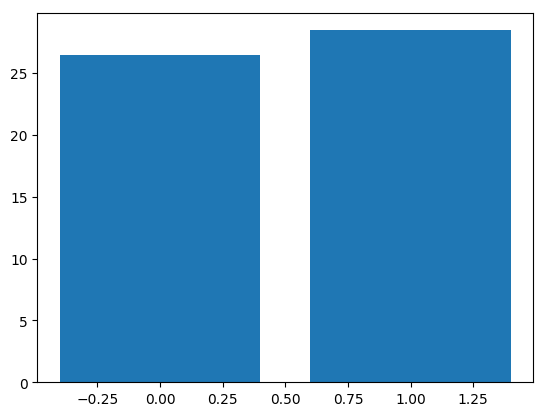

In [0]:
import matplotlib.pyplot as plt

cardio = heartsProcessed \
                .groupBy('cardio') \
                  .agg(F.mean('bmi').alias('imc')) \
                .toPandas()

fig, ax = plt.subplots()
ax.bar(cardio.cardio, cardio.imc)

display(fig)

In [0]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

df = heartsProcessed.toPandas()
df.describe().transpose()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68449 entries, 0 to 68448
Data columns (total 13 columns):
age 68449 non-null int32
gender 68449 non-null int32
height 68449 non-null int32
weight 68449 non-null int32
ap_hi 68449 non-null int32
ap_lo 68449 non-null int32
cholesterol 68449 non-null int32
gluc 68449 non-null int32
smoke 68449 non-null int32
alco 68449 non-null int32
active 68449 non-null int32
cardio 68449 non-null int32
bmi 68449 non-null float64
dtypes: float64(1), int32(12)
memory usage: 3.7 MB

In [0]:
#Criando o eixo X com as variáveis
X=df.drop('cardio',axis=1)

#Criando o eixo Y com a variável alvo "Possui doença cardiovascular"
y=df['cardio']

X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [0]:
scaler=StandardScaler()
X_train[['age','bmi','ap_hi','ap_lo']]=scaler.fit_transform(X_train[['age','bmi','ap_hi','ap_lo']])
df['cardio'].sum()/len(df) *100

Out[28]: 49.46164297506173

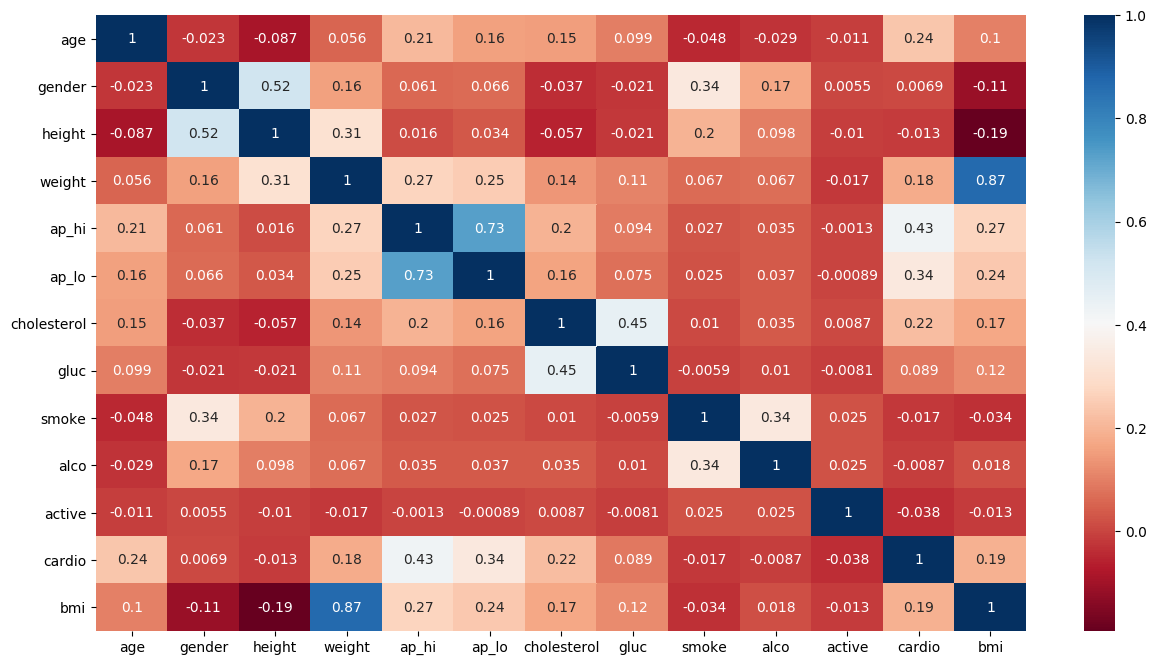

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics

#Agora vamos gerar um mapa de calor para identificar as variáveis que mais influenciam umas as outras
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
display(fig)

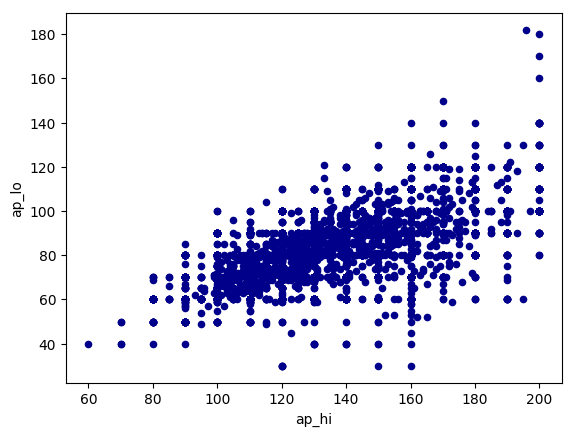

In [0]:
#Aqui demonstramos a correlaçao existente entre pressao alta e pressao baixa
ax1 = df.plot.scatter(x='ap_hi',
                       y='ap_lo',
                       c='DarkBlue')
display(ax1)

In [0]:
#Consulta para identificar o sexo que mais fuma
display(heartsProcessed.where("smoke=1").groupBy("gender").agg(F.count('smoke').alias('Qtd')).orderBy("gender"))

gender,Qtd
0,792
1,5232


In [0]:
#Consulta para identificar o sexo que mais bebe
display(heartsProcessed.where("alco=1").groupBy("gender").agg(F.count('alco').alias('Qtd')).orderBy("gender"))

gender,Qtd
0,1123
1,2530


In [0]:
#Consulta para identificar o sexo que mais é ativo
display(heartsProcessed.where("active=1").groupBy("gender").agg(F.count('active').alias('Qtd')).orderBy("gender"))

gender,Qtd
0,35741
1,19250


In [0]:
#Consulta para identificar o sexo que mais tem doenças cardiovasculares
display(heartsProcessed.where("cardio=1").groupBy("gender").agg(F.count('cardio').alias('Qtd')).orderBy("gender"))

gender,Qtd
0,21936
1,11920
